In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import estnltk

In [3]:
import psycopg2

In [4]:
import time
from datetime import timedelta

In [5]:
con = psycopg2.connect(user = "sormusbi",
                       password = "",
                       host = "postgres.keeleressursid.ee",
                       database = "estonian-text-corpora")

try:
    cursor = con.cursor("client-side-cursor");
except (Exception, psycopg2.Error) as error:
    print("Error in Connection",error)

In [7]:
start = time.time()
print("Start:", str(timedelta(seconds=start+7200)).split(", ")[1])

try:
    cursor.execute('SELECT * FROM estonian_text_corpora.koondkorpus_base_v2__v166_morph_analysis__layer LIMIT 10000;')
    texts = cursor.fetchall() 
except (Exception, psycopg2.Error) as error:
    con.rollback()
    print("Error while inserting data into the table:", error)
    
end = time.time()
print("End:", str(timedelta(seconds=end+7200)).split(", ")[1])
print("Aega kulus:", end-start, "sekundit")

Start: 18:29:20.224985
End: 18:33:42.913858
Aega kulus: 262.6888737678528 sekundit


In [20]:
import time
from datetime import timedelta

start = time.time()
print("Start:", str(timedelta(seconds=start+7200)).split(", ")[1])

cursor.itersize = 10000

more_texts = []

try:
    cursor.execute('SELECT * FROM estonian_text_corpora.koondkorpus_base_v2__v166_morph_analysis__layer LIMIT 100000;')
    #all_texts = cursor.fetchall()
    
    for row in cursor:
        more_texts.append(row)
    
    print("10k more done:", str(timedelta(seconds=time.time()+7200)).split(", ")[1])
    
    '''while len(all_texts) < 100000:
    
        records = cursor.fetchmany(size=10000)

        if not records:
            break

        more_texts.extend(records)
        
        print("10k more done:", str(timedelta(seconds=time.time()+7200)).split(", ")[1])'''

except (Exception, psycopg2.Error) as error:
    con.rollback()
    print("Error while inserting data into the table:", error)

end = time.time()
print("End:", str(timedelta(seconds=end+7200)).split(", ")[1])
print("Aega kulus:", end-start, "sekundit")

Start: 21:14:56.200319
Error while inserting data into the table: 
End: 23:13:49.877898
Aega kulus: 7133.677578687668 sekundit


In [3]:
from estnltk.storage.postgres import PostgresStorage

In [4]:
storage = PostgresStorage(host="postgres.keeleressursid.ee",
                          dbname="estonian-text-corpora",
                          user="sormusbi",
                          password="",
                         port=5432,
                         schema="estonian_text_corpora")

INFO:storage.py:42: connecting to host: 'postgres.keeleressursid.ee', port: 5432, dbname: 'estonian-text-corpora', user: 'sormusbi'
INFO:storage.py:58: schema: 'estonian_text_corpora', temporary: False, role: 'sormusbi'


In [5]:
storage

DEBUG:pg_operations.py:75: SELECT table_name, pg_size_pretty(pg_total_relation_size('estonian_text_corpora'||'.'||table_name)), obj_description(('estonian_text_corpora'||'.'||table_name)::regclass), S.n_live_tup FROM information_schema.tables LEFT JOIN pg_stat_user_tables S ON S.relname = table_name AND S.schemaname = table_schema WHERE table_schema='estonian_text_corpora' AND table_type='BASE TABLE';
DEBUG:pg_operations.py:75: SELECT table_name, pg_size_pretty(pg_total_relation_size('estonian_text_corpora'||'.'||table_name)), obj_description(('estonian_text_corpora'||'.'||table_name)::regclass), S.n_live_tup FROM information_schema.tables LEFT JOIN pg_stat_user_tables S ON S.relname = table_name AND S.schemaname = table_schema WHERE table_schema='estonian_text_corpora' AND table_type='BASE TABLE';
DEBUG:pg_operations.py:75: SELECT table_name, pg_size_pretty(pg_total_relation_size('estonian_text_corpora'||'.'||table_name)), obj_description(('estonian_text_corpora'||'.'||table_name)::re

In [6]:
collection = storage['koondkorpus_base_v2']

DEBUG:pg_operations.py:75: SELECT table_name, pg_size_pretty(pg_total_relation_size('estonian_text_corpora'||'.'||table_name)), obj_description(('estonian_text_corpora'||'.'||table_name)::regclass), S.n_live_tup FROM information_schema.tables LEFT JOIN pg_stat_user_tables S ON S.relname = table_name AND S.schemaname = table_schema WHERE table_schema='estonian_text_corpora' AND table_type='BASE TABLE';


In [7]:
collection

In [8]:
collection.selected_layers = ['v166_morph_analysis', 'v166_sentences']

In [9]:
collection.selected_layers

['v166_words', 'v166_morph_analysis', 'v166_sentences']

In [10]:
len(collection)

705356

In [13]:
import time
from datetime import timedelta, datetime

In [ ]:
start = time.time()
print("Start:", str(timedelta(seconds=start+7200)).split(", ")[1])

c = collection[0]
print(c)

end = time.time()
print("End:", str(timedelta(seconds=end+7200)).split(", ")[1])

In [11]:
texts = []

In [18]:
start = datetime.now()
for i, text in enumerate(collection.select(layers=collection.selected_layers, return_index=False, progressbar='notebook')):
    if i == 1: 
        first = datetime.now()
        print(first-start)
    if i > 10000:
        break
        
    texts.append(text)
        
end = datetime.now()
print(end-first)

DEBUG:subcollection.py:95: SELECT count(*) FROM (SELECT "estonian_text_corpora"."koondkorpus_base_v2"."id", "estonian_text_corpora"."koondkorpus_base_v2"."data", "estonian_text_corpora"."koondkorpus_base_v2__v166_words__layer"."data", "estonian_text_corpora"."koondkorpus_base_v2__v166_morph_analysis__layer"."data", "estonian_text_corpora"."koondkorpus_base_v2__v166_sentences__layer"."data" FROM "estonian_text_corpora"."koondkorpus_base_v2", "estonian_text_corpora"."koondkorpus_base_v2__v166_morph_analysis__layer", "estonian_text_corpora"."koondkorpus_base_v2__v166_sentences__layer", "estonian_text_corpora"."koondkorpus_base_v2__v166_words__layer" WHERE "estonian_text_corpora"."koondkorpus_base_v2"."id" = "estonian_text_corpora"."koondkorpus_base_v2__v166_morph_analysis__layer"."text_id" AND "estonian_text_corpora"."koondkorpus_base_v2"."id" = "estonian_text_corpora"."koondkorpus_base_v2__v166_sentences__layer"."text_id" AND "estonian_text_corpora"."koondkorpus_base_v2"."id" = "estonian

0:00:06.608471


1:23:32.104342


In [22]:
texts[0] == texts[-10001]

True

In [23]:
texts_10k = texts[-10001:]

In [24]:
len(texts_10k)

10001

In [25]:
texts_10k[0]

Text(text="Sven Haljand\n\nHelilooja SVEN LÕHMUS on keeruline kui ruubikukuubik . Endine punkar , tulevane lendur , karateka ja orkestrijuht , kuid eelkõige magusate poplugude autor .\n\nKaheksakümnendate aastate lõpus toimus Türi 1. Keskkoolis punkbändi Kass Ai-ai kontsert . Bändi , mille solist ei osanud laulda , kidramees ei saanud keeltele pihta ja trummari eesmärk oli võimalikult palju müra teha . Esinemine kulmineerus pillide purukspeksmisega . Kaose lõpetas rahva laiali ajanud miilits . Üks tolle õhtu süüdlasi oli kitarrist Sven Lõhmus ( 30 ) - tänane Eesti edukaim poplugude meisterdaja , kelle sulest on pärit Eurovisiooni eelvoorus rahva lemmikuks valitud Vanilla Ninja lugu “ Club “ Kung-fu .\n\nPunkarivälimus , rock 'n'roll elustiil ... Kui sageli tuli sul kooli juhtkonna ees aru anda ?\n\nMind kutsuti tihti direktori jutule , aga mitte niivõrd välimuse , kui just käitumise pärast . Ma viilisin tundidest igal võimalikul juhul . Olin luuser , kelle jaoks olid ringihängimine ja bänd õppimisest mitu korda tähtsamad . Tšillisime oma gängiga kooli raadioruumis ja tegime bändi . Tol ajal oli mu ainuke prioriteet muusika , mille kõrvalt tuli kool lihtsalt kuidagi lõpetada .\n\nHakkasin koos venna Suleviga muusikat tegema , kui tema oli viie- ja mina seitsmeaastane . Esimese loo kirjutasin kaheksaselt . See rockstiilis pala peaks isa vanadel lintidel alles olema . Päris lahe oleks kuulata , mida ma kunagi välja mõtlesin .\n\nAlustasid karmi muusikaga , aga nüüd täidavad su palad ööklubide tantsupõrandaid . Millest selline muutus ?\n\nMida jäigem oli poliitiline olukord , seda enam ma oma lugudega lajatada tahtsin . Tasapisi hakkasid aga puhuma uued tuuled ja pungivaimustus vaibus . Ma jõudsin tantsumuusikani 90ndate aastate algul pooljuhuslikult . Tegutsesin siis diskorina ja nägin , et eurobiit ja disko lähevad rahvale peale . Mõtlesin , et miks mitte ise naljakat värki teha . Hiljem tulid juba ansamblid Mr. Happyman ja Black Velvet . Kuid kuulan siiani meeleldi Sex Pistolsit , Metallicat ja teisi vihaseid tegijaid . Pidevalt tantsumusa sees olles tekib sellest küllastus .\n\nLaval olid sa sadade piigade ihalusobjekt , aga heliloojana jääd varju . Kas vahel tekib igatsus kuulsusesära järele ?\n\nMulle on lugude kirjutamine enese näitamisest olulisem . Kuigi laval on mõnus olla , pole ma nii ambitsioonikas ja edev , et end pidevalt presenteerida . Pealegi saan oma lugudega sõnumi laulja kaudu edasi anda niisama hästi kui ise laval olles .\n\nSamas võin areenile alati tagasi tulla . Black Velvet lagunes , sest Lauri Liiv oli hõivatud muusikalidega , Sulev läks õppima ja mina tegelesin musaproduktsiooniga . Pole välistatud , et me pundi kunagi ellu kutsume .\n\nSinu ainuke teenistus on lugude kirjutamine . Kuidas sa rahaliselt toime tuled ?\n\nEestis loominguga rikkaks ei saa , aga elada ja hingata õnnestub . Mulle meeldib teha südamelähedasi asju nii hästi kui võimalik ja ma püüan selle eest ka head tasu saada . See on mu kutsumus . Ega näitlejategi palgad kuigi suured ole , aga ka nemad ei taha olla bussijuhid või torumehed .\n\nMinu sissetulek on autorikaitsest makstavad tasud . See on ebastabiilne , aga just ebastabiilsus on õpetanud mind kokkuhoidlikult elama . Samas võin vahel ka päris suur laristaja olla . Kui näen letil mõnda head filmi , plaati või šeffi riietuseset , neelan konksu alla ja ostan ära , maksku mis maksab .\n\nKui palju raha sa normaalseks äraelamiseks vajad ?\n\nRaha peab olema nii palju , et süüa ostes poleks vaja sente lugeda . Kui sa ei saa toidupoest soovitut , on asi päris hull . Mul on selliseid aegu olnud .\n\nKui palju sa lugusid oled kirjutanud ?\n\nMa pole üle lugenud , aga neid peaks olema sadu . Olen viimasel ajal juhutöödest loobunud ja kirjutan kindlatele bändidele . Praegu põhiliselt Vanilla Ninjale , sest neil tuleb mais ilmuva plaadi jaoks materjal kokku panna . Hetkel on vist vara rääkida , aga ninjade vastu on rahvusvahelist huvi tunda .\n\nKui inspireeriv on sinu jaoks alkohol ?\n\nAl

In [46]:
getattr(texts_10k[0].v166_sentences[0][0], 'v166_morph_analysis').partofspeech

,partofspeech
0,H


In [47]:
start = time.time()
print("Start:", str(timedelta(seconds=start+7200)).split(", ")[1])

paarid = []

for t in texts_10k:
    for sentence in t.v166_sentences:
        for i, word in enumerate(sentence):
            word = getattr(word, 'v166_morph_analysis')
            #for idx in range(5):
            #    if i + idx < len(sentence):
            if word.partofspeech[0] != 'S':
                continue

            noun = word.lemma[0]

            if i - 1 >= 0:
                word2 = getattr(sentence[i-1], 'v166_morph_analysis')

                if word2.partofspeech[0] == 'A':
                    paarid.append((word2.lemma[0], noun))

            if i - 2 >= 0:
                word3 = getattr(sentence[i-2], 'v166_morph_analysis')

                if word3.partofspeech[0] == 'A':
                    paarid.append((word3.lemma[0], noun))

            if i - 3 >= 0:
                word4 = getattr(sentence[i-3], 'v166_morph_analysis')
                if word4.partofspeech[0] == 'A':
                    paarid.append((word4.lemma[0], noun))
                                        
            if i + 2 < len(sentence) - 1:
                if getattr(sentence[i+1], 'v166_morph_analysis').lemma[0] == 'olema' and getattr(sentence[i+2], 'v166_morph_analysis').partofspeech[0] == 'A':
                    paarid.append((getattr(sentence[i+2], 'v166_morph_analysis').lemma[0], noun))
                
end = time.time()
print("End:", str(timedelta(seconds=end+7200)).split(", ")[1])
print("Aega kulus:", end-start, "sekundit")

Start: 13:15:01.639730
End: 13:31:57.277838
Aega kulus: 1015.6381084918976 sekundit


In [48]:
len(paarid)

577507

21.28 - 1237/705356

In [15]:
start = datetime.now()
for i, text in enumerate(collection.select(layers=collection.selected_layers, return_index=False, progressbar='notebook')):
    if i == 1: 
        first = datetime.now()
        print(first-start)
    if i > 10000:
        break
        
    texts.append(text)
        
end = datetime.now()
print(end-first)

DEBUG:subcollection.py:95: SELECT count(*) FROM (SELECT "estonian_text_corpora"."koondkorpus_base_v2"."id", "estonian_text_corpora"."koondkorpus_base_v2"."data", "estonian_text_corpora"."koondkorpus_base_v2__v166_words__layer"."data", "estonian_text_corpora"."koondkorpus_base_v2__v166_morph_analysis__layer"."data", "estonian_text_corpora"."koondkorpus_base_v2__v166_sentences__layer"."data" FROM "estonian_text_corpora"."koondkorpus_base_v2", "estonian_text_corpora"."koondkorpus_base_v2__v166_morph_analysis__layer", "estonian_text_corpora"."koondkorpus_base_v2__v166_sentences__layer", "estonian_text_corpora"."koondkorpus_base_v2__v166_words__layer" WHERE "estonian_text_corpora"."koondkorpus_base_v2"."id" = "estonian_text_corpora"."koondkorpus_base_v2__v166_morph_analysis__layer"."text_id" AND "estonian_text_corpora"."koondkorpus_base_v2"."id" = "estonian_text_corpora"."koondkorpus_base_v2__v166_sentences__layer"."text_id" AND "estonian_text_corpora"."koondkorpus_base_v2"."id" = "estonian

0:00:05.758680



KeyboardInterrupt: 

In [17]:
len(texts)

5462

In [30]:
start = time.time()
print("Start:", str(timedelta(seconds=start+7200)).split(", ")[1])

for i, text in enumerate(collection):
    if i == 10000:
        break
    texts.append(text)
    
end = time.time()
print("End:", str(timedelta(seconds=end+7200)).split(", ")[1])

Start: 13:23:54.738331
End: 14:51:56.907832


In [31]:
len(texts)

10000

In [34]:
texts[0]

Text(text="Sven Haljand\n\nHelilooja SVEN LÕHMUS on keeruline kui ruubikukuubik . Endine punkar , tulevane lendur , karateka ja orkestrijuht , kuid eelkõige magusate poplugude autor .\n\nKaheksakümnendate aastate lõpus toimus Türi 1. Keskkoolis punkbändi Kass Ai-ai kontsert . Bändi , mille solist ei osanud laulda , kidramees ei saanud keeltele pihta ja trummari eesmärk oli võimalikult palju müra teha . Esinemine kulmineerus pillide purukspeksmisega . Kaose lõpetas rahva laiali ajanud miilits . Üks tolle õhtu süüdlasi oli kitarrist Sven Lõhmus ( 30 ) - tänane Eesti edukaim poplugude meisterdaja , kelle sulest on pärit Eurovisiooni eelvoorus rahva lemmikuks valitud Vanilla Ninja lugu “ Club “ Kung-fu .\n\nPunkarivälimus , rock 'n'roll elustiil ... Kui sageli tuli sul kooli juhtkonna ees aru anda ?\n\nMind kutsuti tihti direktori jutule , aga mitte niivõrd välimuse , kui just käitumise pärast . Ma viilisin tundidest igal võimalikul juhul . Olin luuser , kelle jaoks olid ringihängimine ja bänd õppimisest mitu korda tähtsamad . Tšillisime oma gängiga kooli raadioruumis ja tegime bändi . Tol ajal oli mu ainuke prioriteet muusika , mille kõrvalt tuli kool lihtsalt kuidagi lõpetada .\n\nHakkasin koos venna Suleviga muusikat tegema , kui tema oli viie- ja mina seitsmeaastane . Esimese loo kirjutasin kaheksaselt . See rockstiilis pala peaks isa vanadel lintidel alles olema . Päris lahe oleks kuulata , mida ma kunagi välja mõtlesin .\n\nAlustasid karmi muusikaga , aga nüüd täidavad su palad ööklubide tantsupõrandaid . Millest selline muutus ?\n\nMida jäigem oli poliitiline olukord , seda enam ma oma lugudega lajatada tahtsin . Tasapisi hakkasid aga puhuma uued tuuled ja pungivaimustus vaibus . Ma jõudsin tantsumuusikani 90ndate aastate algul pooljuhuslikult . Tegutsesin siis diskorina ja nägin , et eurobiit ja disko lähevad rahvale peale . Mõtlesin , et miks mitte ise naljakat värki teha . Hiljem tulid juba ansamblid Mr. Happyman ja Black Velvet . Kuid kuulan siiani meeleldi Sex Pistolsit , Metallicat ja teisi vihaseid tegijaid . Pidevalt tantsumusa sees olles tekib sellest küllastus .\n\nLaval olid sa sadade piigade ihalusobjekt , aga heliloojana jääd varju . Kas vahel tekib igatsus kuulsusesära järele ?\n\nMulle on lugude kirjutamine enese näitamisest olulisem . Kuigi laval on mõnus olla , pole ma nii ambitsioonikas ja edev , et end pidevalt presenteerida . Pealegi saan oma lugudega sõnumi laulja kaudu edasi anda niisama hästi kui ise laval olles .\n\nSamas võin areenile alati tagasi tulla . Black Velvet lagunes , sest Lauri Liiv oli hõivatud muusikalidega , Sulev läks õppima ja mina tegelesin musaproduktsiooniga . Pole välistatud , et me pundi kunagi ellu kutsume .\n\nSinu ainuke teenistus on lugude kirjutamine . Kuidas sa rahaliselt toime tuled ?\n\nEestis loominguga rikkaks ei saa , aga elada ja hingata õnnestub . Mulle meeldib teha südamelähedasi asju nii hästi kui võimalik ja ma püüan selle eest ka head tasu saada . See on mu kutsumus . Ega näitlejategi palgad kuigi suured ole , aga ka nemad ei taha olla bussijuhid või torumehed .\n\nMinu sissetulek on autorikaitsest makstavad tasud . See on ebastabiilne , aga just ebastabiilsus on õpetanud mind kokkuhoidlikult elama . Samas võin vahel ka päris suur laristaja olla . Kui näen letil mõnda head filmi , plaati või šeffi riietuseset , neelan konksu alla ja ostan ära , maksku mis maksab .\n\nKui palju raha sa normaalseks äraelamiseks vajad ?\n\nRaha peab olema nii palju , et süüa ostes poleks vaja sente lugeda . Kui sa ei saa toidupoest soovitut , on asi päris hull . Mul on selliseid aegu olnud .\n\nKui palju sa lugusid oled kirjutanud ?\n\nMa pole üle lugenud , aga neid peaks olema sadu . Olen viimasel ajal juhutöödest loobunud ja kirjutan kindlatele bändidele . Praegu põhiliselt Vanilla Ninjale , sest neil tuleb mais ilmuva plaadi jaoks materjal kokku panna . Hetkel on vist vara rääkida , aga ninjade vastu on rahvusvahelist huvi tunda .\n\nKui inspireeriv on sinu jaoks alkohol ?\n\nAl

In [49]:
texts[0].v166_sentences[0][0].v166_morph_analysis.partofspeech[0]

'H'

In [65]:
texts[0].meta

{'file': 'aja_kr_2003_02_18.xml',
 'type': 'artikkel',
 'title': 'Eurovisiooni Don Quijote',
 'author': 'Sven Haljand',
 'rubriik': 'Pikad Lood',
 'subcorpus': 'aja_kr',
 'ajakirjanumber': 'Kroonika 18.02.2003'}

In [66]:
texts[0].meta['subcorpus']

'aja_kr'

In [69]:
texts[0].meta

{'file': 'aja_kr_2003_02_18.xml',
 'type': 'artikkel',
 'title': 'Eurovisiooni Don Quijote',
 'author': 'Sven Haljand',
 'rubriik': 'Pikad Lood',
 'subcorpus': 'aja_kr',
 'ajakirjanumber': 'Kroonika 18.02.2003'}

In [67]:
storage.close()

OperationalError: server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.


In [21]:
len(more_texts)

48338

In [39]:
print("Start:", str(timedelta(seconds=time.time()+7200)).split(", ")[1])

Start: 22:11:50.724330


In [22]:
start = time.time()
print("Start:", str(timedelta(seconds=start+7200)).split(", ")[1])

paarid = []

#t = texts[0][2]['spans']

#for t in analyzed_texts:
#    for sentence in t.sentences:
for text in more_texts:
    t = text[2]['spans']
    for i, span in enumerate(t):
        annotations = span['annotations']
        #for idx in range(5):
        #    if i + idx < len(sentence):
        if annotations[0]['partofspeech'] != 'S':
            continue

        noun = annotations[0]['lemma']

        if i - 1 >= 0:
            word2 = t[i-1]['annotations'][0]

            if word2['partofspeech'] == 'A':
                paarid.append((word2['lemma'], noun))

        if i - 2 >= 0:
            word3 = t[i-2]['annotations'][0]

            if word3['partofspeech'] == 'A' and t[i-1]['annotations'][0]['partofspeech'] != 'Z':
                paarid.append((word3['lemma'], noun))

        if i - 3 >= 0:
            word4 = t[i-3]['annotations'][0]
            if word4['partofspeech'] == 'A':
                if t[i-1]['annotations'][0]['lemma'] not in ['.', '!', '?'] and t[i-2]['annotations'][0]['lemma'] not in ['.', '!', '?']:
                    paarid.append((word4['lemma'], noun))

        if i + 2 < len(t) - 1:
            if t[i+1]['annotations'][0]['lemma'] == 'olema' and t[i+2]['annotations'][0]['partofspeech'] == 'A':
                paarid.append((t[i+2]['annotations'][0]['lemma'], noun))
                
end = time.time()
print("End:", str(timedelta(seconds=end+7200)).split(", ")[1])
print("Aega kulus:", end-start, "sekundit")

Start: 23:18:50.244680
End: 23:29:09.146609
Aega kulus: 618.9019284248352 sekundit


In [23]:
len(paarid)

1708424

In [24]:
from collections import Counter

In [25]:
pair_counts = Counter(paarid).most_common()

In [26]:
len(pair_counts)

734130

In [27]:
pair_counts[0]

(('käesolev', 'määrus'), 14552)

In [28]:
pair_tuples = []

for pair in pair_counts:
    pair_tuples.append((pair[0][0], pair[0][1], pair[1]))

In [2]:
con = psycopg2.connect(user = "postgres",
                       password = "birgit123",
                       host = "127.0.0.1",
                       port = "5432",
                       database = "adj_noun_pairs")

try:
    cursor = con.cursor();
except (Exception, psycopg2.Error) as error:
    print("Error in Connection",error)

In [30]:
# Create adjective and noun pair table
try:
    pair_table = "pair_counts_50000"
    create_table_query = '''CREATE TABLE '''+ pair_table +''' 
              (adjective      TEXT    NOT NULL,
               noun           TEXT    NOT NULL,
               count          INT     NOT NULL   
               ); '''

    #Execute this command (SQL Query)
    cursor.execute(create_table_query)
    
    # Make the changes to the database persistent
    con.commit()
    print("Table ("+ pair_table +") created successfully in PostgreSQL ")
except (Exception, psycopg2.Error) as error:
    # if it exits with an exception the transaction is rolled back.
    con.rollback()
    print("Error while creating the table: ", error)

Table (pair_counts_50000) created successfully in PostgreSQL 


In [31]:
try:
    cursor.executemany("INSERT INTO pair_counts_50000 VALUES (%s, %s, %s)", pair_tuples)
    con.commit()
except (Exception, psycopg2.Error) as error:
    con.rollback()
    print("Error while inserting data into the table:", error)

### Selecting data from database

In [16]:
con = psycopg2.connect(user = "postgres",
                       password = "",
                       host = "127.0.0.1",
                       port = "5432",
                       database = "adj_noun_pairs")

try:
    cursor = con.cursor();
except (Exception, psycopg2.Error) as error:
    print("Error in Connection",error)

In [17]:
try:
    cursor.execute("SELECT DISTINCT noun FROM pair_counts_50000")
    nouns = cursor.fetchall() 
except (Exception, psycopg2.Error) as error:
    con.rollback()
    print("Error while inserting data into the table:", error)

In [18]:
nouns = [noun[0] for noun in nouns]
print(len(nouns))

114315


In [19]:
try:
    cursor.execute("SELECT DISTINCT adjective FROM pair_counts_50000")
    adjectives = cursor.fetchall() 
except (Exception, psycopg2.Error) as error:
    con.rollback()
    print("Error while inserting data into the table:", error)

In [20]:
adjectives = [adj[0] for adj in adjectives]
print(len(adjectives))

33659


In [44]:
try:
    cursor.execute("SELECT * FROM pair_counts_50000 LIMIT 100000")
    pairs = cursor.fetchall() 
except (Exception, psycopg2.Error) as error:
    con.rollback()
    print("Error while inserting data into the table:", error)

In [46]:
nouns = list(set([p[1] for p in pairs]))

In [47]:
adjectives = list(set([p[0] for p in pairs]))

In [48]:
print(len(nouns), len(adjectives))

16746 7107


In [49]:
import pandas as pd
import numpy as np

In [50]:
data = pd.DataFrame(0, index=nouns, columns=adjectives)
data.head()

,15kuuline,subsideeritav,ergas,homogeenne,puhas,ettemakstud,omavalmistatud,kehaväline,põllumajanduslik,registreeriv,...,töötajapoolne,kuueteistkümneaastane,fokaalne,sisselastud,poolteiseaastane,jõuramlik,kuune,uimastivastane,raamatulembene,ruumiline
spekuleerimisoht,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kauglöök,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
müügiedu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
koopia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
for tup in pairs:
    data.loc[tup[1], tup[0]] = tup[2]

In [52]:
#data = data.fillna(0)
data.head()

,15kuuline,subsideeritav,ergas,homogeenne,puhas,ettemakstud,omavalmistatud,kehaväline,põllumajanduslik,registreeriv,...,töötajapoolne,kuueteistkümneaastane,fokaalne,sisselastud,poolteiseaastane,jõuramlik,kuune,uimastivastane,raamatulembene,ruumiline
spekuleerimisoht,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kauglöök,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
müügiedu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
koopia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
data.shape

(16746, 7107)

### Model

In [54]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

In [55]:
to_use_new = []

for noun in data.index:
    if len([val for val in data.loc[noun] if val >= 3]) >= 5:
        to_use_new.append(noun)

In [56]:
len(to_use_new)

2566

In [57]:
new = data.loc[to_use_new]

In [58]:
new.head()

,15kuuline,subsideeritav,ergas,homogeenne,puhas,ettemakstud,omavalmistatud,kehaväline,põllumajanduslik,registreeriv,...,töötajapoolne,kuueteistkümneaastane,fokaalne,sisselastud,poolteiseaastane,jõuramlik,kuune,uimastivastane,raamatulembene,ruumiline
koopia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
traktor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kättesaamine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jäätmed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tähis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
lda = LatentDirichletAllocation(n_components=500, random_state=17)
lda.fit_transform(new)

array([[1.63934426e-05, 1.63934426e-05, 1.63934426e-05, ...,
        1.63934426e-05, 1.63934426e-05, 1.63934426e-05],
       [8.33333333e-05, 8.33333333e-05, 8.33333333e-05, ...,
        8.33333333e-05, 8.33333333e-05, 8.33333333e-05],
       [5.88242958e-05, 5.88235294e-05, 5.88235294e-05, ...,
        5.88235294e-05, 5.88235294e-05, 9.16225741e-02],
       ...,
       [2.38095238e-05, 2.38095238e-05, 2.38095238e-05, ...,
        2.38095238e-05, 4.21467381e-02, 2.38095238e-05],
       [2.50000000e-05, 2.50000000e-05, 2.50000000e-05, ...,
        2.50000000e-05, 2.30535453e-02, 2.50000000e-05],
       [3.78071834e-06, 3.95924734e-01, 3.78071834e-06, ...,
        3.78071834e-06, 3.78071834e-06, 3.78071834e-06]])

In [69]:
topics_test = {}
for i in range(500):
    topics_test[i] = []
    
topic_probs_test = lda.transform(new)
for i, prob in enumerate(topic_probs_test):
    topics_test[np.argmax(prob)].append(new.index[i])

In [70]:
print([len(topic) for topic in topics_test.values()])

[7, 6, 3, 3, 5, 5, 3, 4, 4, 5, 4, 9, 6, 2, 3, 5, 4, 6, 2, 7, 12, 4, 7, 3, 3, 2, 2, 3, 3, 3, 5, 6, 2, 11, 6, 7, 6, 36, 4, 1, 4, 2, 4, 3, 4, 3, 4, 5, 5, 6, 5, 7, 5, 4, 7, 1, 4, 9, 5, 5, 3, 3, 4, 5, 5, 7, 5, 8, 6, 4, 5, 5, 3, 3, 3, 2, 5, 7, 2, 3, 4, 3, 2, 5, 9, 2, 2, 4, 4, 4, 11, 5, 5, 4, 4, 4, 7, 3, 1, 10, 1, 1, 4, 10, 6, 6, 21, 3, 7, 7, 3, 4, 3, 6, 3, 3, 5, 6, 6, 7, 2, 5, 2, 6, 40, 6, 17, 2, 3, 4, 3, 9, 3, 2, 5, 1, 5, 5, 2, 4, 4, 6, 15, 5, 4, 4, 1, 4, 19, 2, 2, 2, 6, 2, 7, 1, 2, 9, 6, 2, 4, 4, 4, 5, 3, 5, 2, 4, 6, 3, 3, 4, 5, 3, 2, 2, 6, 38, 0, 2, 7, 6, 2, 6, 9, 1, 6, 5, 5, 4, 8, 4, 2, 0, 12, 5, 4, 7, 3, 4, 2, 5, 6, 3, 4, 2, 2, 6, 6, 6, 2, 8, 5, 4, 3, 12, 10, 4, 5, 2, 6, 4, 6, 4, 3, 3, 5, 7, 7, 2, 38, 0, 3, 7, 3, 4, 4, 2, 3, 12, 10, 5, 6, 2, 3, 10, 10, 17, 4, 3, 3, 5, 3, 3, 5, 3, 4, 3, 7, 3, 8, 4, 4, 6, 12, 3, 2, 8, 6, 7, 4, 3, 4, 5, 5, 10, 2, 6, 10, 5, 7, 3, 9, 6, 7, 4, 8, 2, 5, 3, 3, 2, 4, 11, 2, 5, 2, 2, 4, 7, 6, 8, 4, 1, 1, 5, 4, 7, 31, 0, 3, 3, 13, 3, 8, 5, 5, 4, 6, 1, 6, 3, 3, 2, 

In [72]:
for i in range(500):
    if len(topics_test[i]) > 5:
        print(topics_test[i])
        print("---------------------------------")

['rahastamine', 'õppekava', 'abitaotlus', 'mõrv', 'osalemine', 'eksemplar', 'maa-ala']
---------------------------------
['kõikumine', 'toimeaine', 'söödalisand', 'omavalitsus', 'fail', 'kontrollimine']
---------------------------------
['tagasimaksmine', 'sadam', 'turvalisus', 'tüübikinnitus', 'koefitsient', 'lahing', 'võitja', 'korraldamine', 'lill']
---------------------------------
['käibemaks', 'imporditollimaks', 'turuleviimine', 'juhend', 'hiir', 'narkomaan']
---------------------------------
['vaheaeg', 'viis', 'üleminekuperiood', 'eksam', 'paus', 'vanglakaristus']
---------------------------------
['kuulsus', 'päevakord', 'maavõistlus', 'peaminister', 'juhatus', 'pealinn', 'sõjaväelane']
---------------------------------
['heakskiitmine', 'valmisolek', 'sisseseade', 'lepe', 'menetlemine', 'piiramine', 'pakkuja', 'nipp', 'edastamine', 'lahend', 'abivahend', 'arendus']
---------------------------------
['sissejuhatus', 'karv', 'miinus', 'pluus', 'küüs', 'bassein', 'soeng']
-----

### LSA (SVD)

In [73]:
from sklearn.decomposition import TruncatedSVD

In [74]:
svd = TruncatedSVD(n_components=100)

In [75]:
svd.fit_transform(new)

array([[ 8.99689001, -5.45492117, -4.32840752, ...,  0.95327023,
        -0.65754731, -0.37859559],
       [ 2.29846772, -0.88156989, -0.45805741, ..., -0.13014492,
        -0.58332928,  0.16800428],
       [ 2.43534972, -1.24318988, -2.76459398, ..., -0.12341607,
         0.66711236,  0.27266424],
       ...,
       [ 6.12929041, -3.40732605,  1.45968049, ..., -1.06092379,
        -1.28712896, -0.15530298],
       [ 6.76731791, -3.42439445, -0.6382871 , ...,  0.98015627,
         0.15924561,  1.29209636],
       [13.52814492,  9.52473982, -3.60752515, ...,  1.46191524,
        -2.45396883,  0.64718176]])

In [80]:
terms = new.columns

for i, comp in enumerate(svd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
olnud
 
võimalik
 
viimane
 
uus
 
suur
 
kogu
 
olev
 
Topic 1: 
võimeline
 
eriline
 
täielik
 
järgnev
 
siinne
 
sobiv
 
sarnane
 
Topic 2: 
hea
 
vana
 
olnud
 
väike
 
tavaline
 
korralik
 
noor
 
Topic 3: 
suur
 
hea
 
uus
 
tulenev
 
kogu
 
väike
 
kõnesolev
 
Topic 4: 
uus
 
kõnealune
 
vastav
 
täielik
 
võimeline
 
kaunis
 
osanud
 
Topic 5: 
viimane
 
olnud
 
uus
 
eelmine
 
praegune
 
rahvusvaheline
 
oluline
 
Topic 6: 
suur
 
seotud
 
võimalik
 
kogu
 
viimane
 
vajalik
 
oluline
 
Topic 7: 
hea
 
võimalik
 
kogu
 
järgmine
 
ettenähtud
 
kindel
 
asjakohane
 
Topic 8: 
hea
 
viimane
 
kogu
 
kindel
 
erinev
 
olev
 
teatav
 
Topic 9: 
hea
 
olnud
 
viimane
 
suur
 
kõnealune
 
eelmine
 
ettenähtud
 
Topic 10: 
järgmine
 
erinev
 
viimane
 
vastav
 
olev
 
suur
 
kasutatav
 
Topic 11: 
olnud
 
olev
 
kogu
 
kuuluv
 
vastav
 
kohalik
 
seotud
 
Topic 12: 
erinev
 
seotud
 
kindel
 
oluline
 
õige
 
eri
 
kohalik
 
Topic 13: 
seotud
 
olev
 
viimane
 
võimalik
 


In [88]:
import umap.umap_ as umap

X_topics = svd.fit_transform(new)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)


C:\Users\Birgit\Anaconda3\envs\py36_estnltk\lib\site-packages\numba\np\ufunc\parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


NameError: name 'plt' is not defined

In [90]:
from matplotlib import pyplot as plt

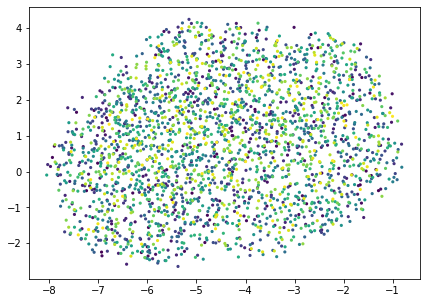

In [95]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = range(len(new.index)),
s = 10, # size
edgecolor='none'
)
plt.show()